## Plotly Express

In [1]:
import pandas as pd
import plotly.express as px

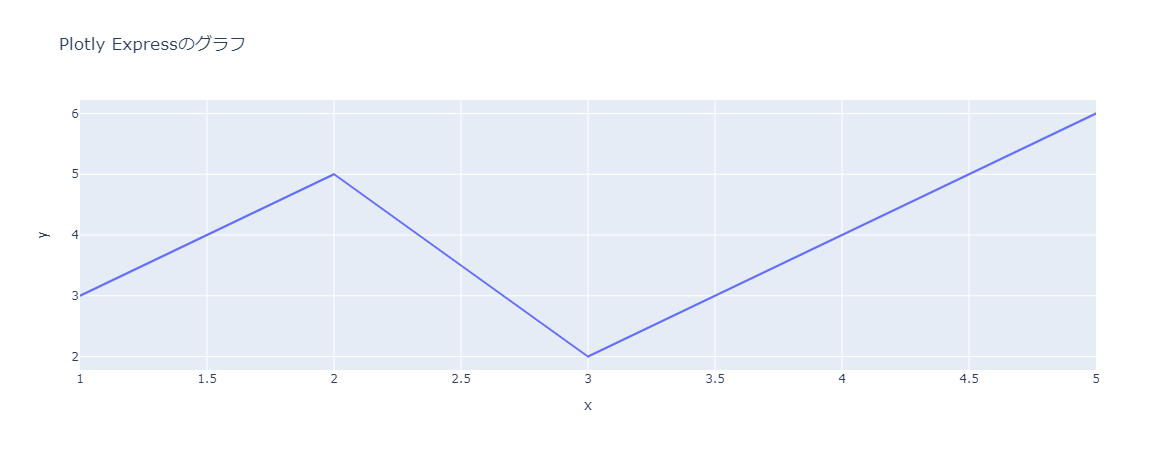

In [2]:
fig = px.line(x=[1,2,3,4,5],y=[3,5,2,4,6], title='Plotly Expressのグラフ')
fig.show()

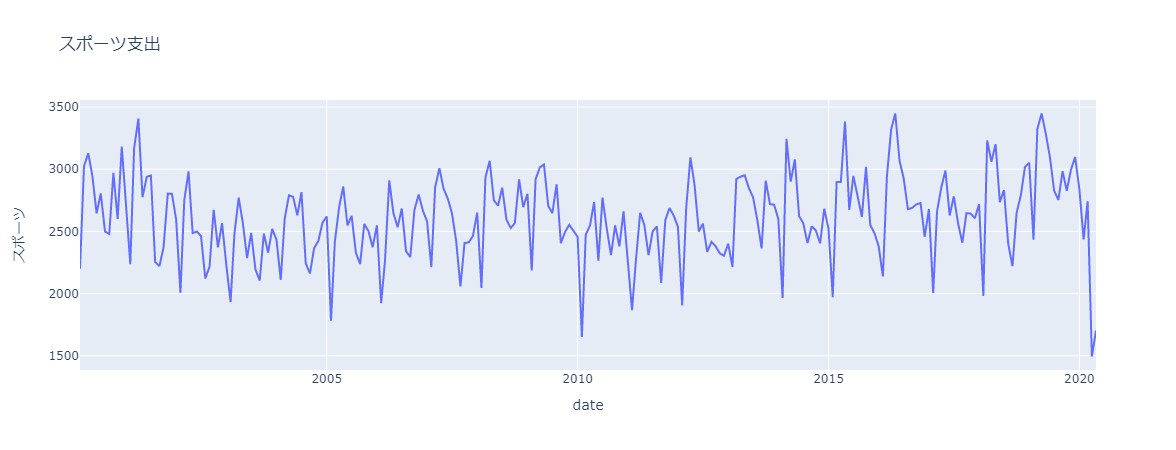

In [3]:
df = pd.read_csv('data/kakei_data.csv', index_col=0, parse_dates=['date'])
fig = px.line(df, x='date', y='スポーツ', title='スポーツ支出')
fig.show()

### 整形データを加工して可視化

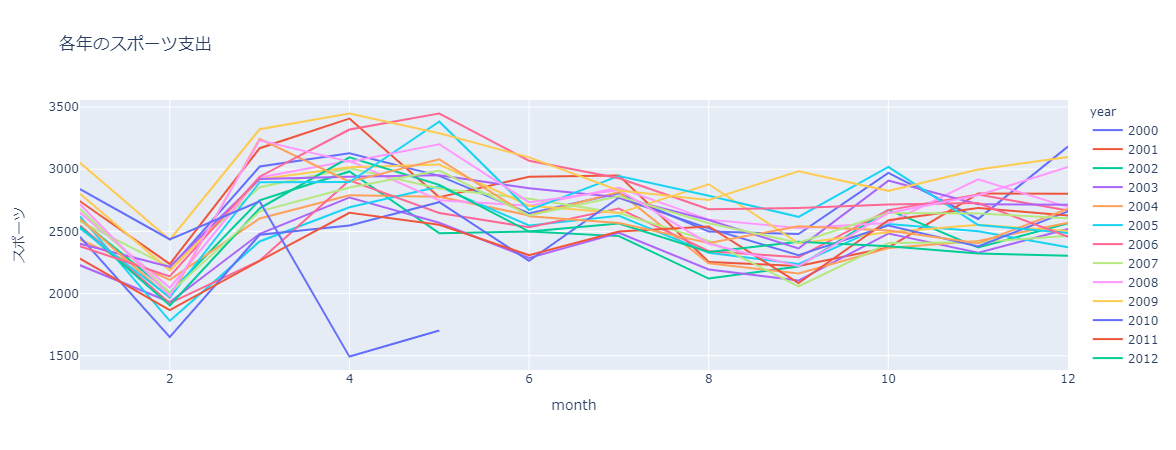

In [4]:
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
fig = px.line(df, x='month', y='スポーツ', color='year', title='各年のスポーツ支出')
fig.show()
## Dailyのデータが作れるようにする

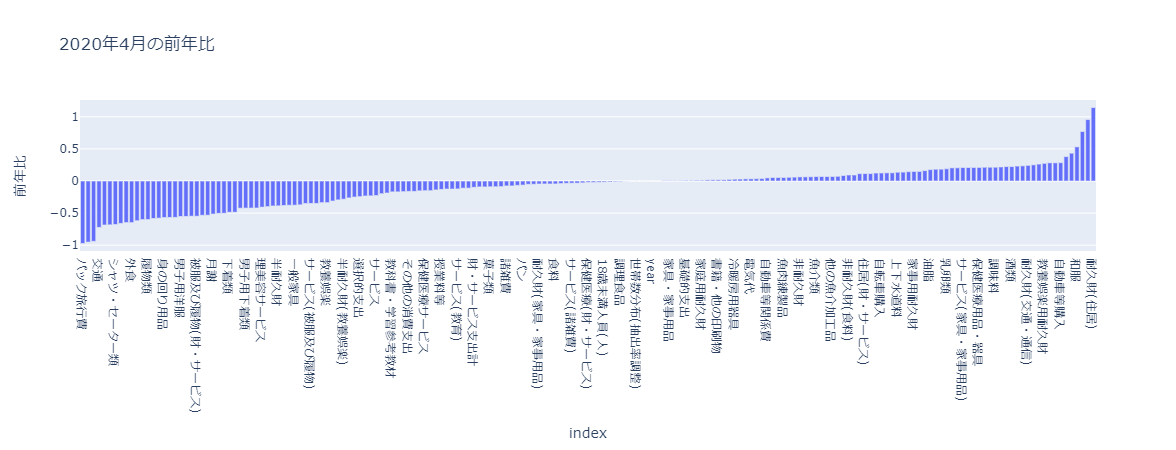

In [5]:
df_yoy = df.copy()
df_yoy.index = df_yoy['date']
df_yoy = df_yoy.loc[:, ~df_yoy.columns.isin(['date'])]
df_yoy = df_yoy.pct_change(12)
df_yoy2004 = df_yoy.loc['2020-4'].T.sort_values(by='20200401')
df_yoy2004.columns = ['前年比']
fig = px.bar(df_yoy2004, x=df_yoy2004.index, y='前年比', title='2020年4月の前年比', width=1000)
fig.show()

## Groupbyを使って可視化
### 新型コロナ感染者数

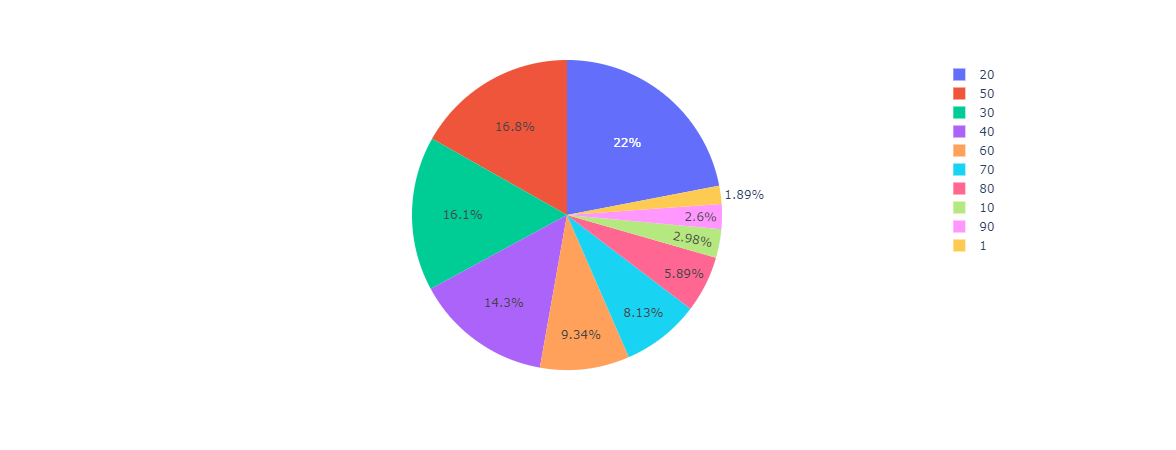

In [6]:
covid = pd.read_csv('data/covid19_data.csv', index_col=0, parse_dates=['確定日', '発症日'])
covid_age = covid.groupby('年代', as_index=False).count()
px.pie(covid_age, names='年代', values='count')

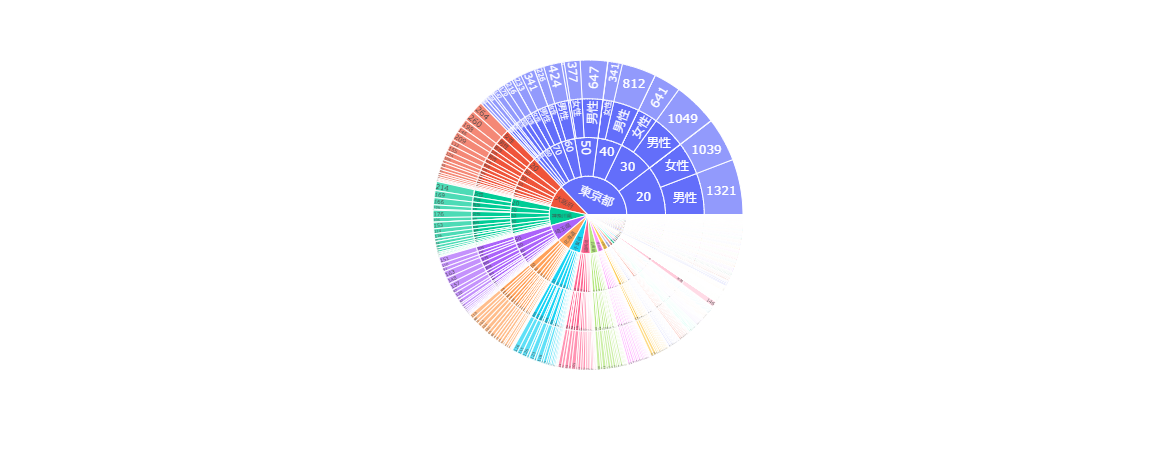

In [7]:
covid_data = covid.groupby(['居住都道府県', '年代', '性別'], as_index=False).count()
fig = px.sunburst(covid_data, path=['居住都道府県', '年代', '性別', 'count'], values='count')
fig.show()

In [8]:
## 整然データを使う
### 財政データ

In [9]:
zaisei = pd.read_csv('data/detail.csv', index_col=0)

In [10]:
zaisei.head()

title        1997        1998        1999        2000        2001  \
0         皇室費     6686157     6643501     6832632     9366209     7408714   
1         国会費   123019403   131142130   138585747   146463865   154158813   
2         選挙費     3534438    57491037     3258220    73263020    63135863   
3  司法、警察及び消防費  1319365876  1399227861  1408610493  1453162305  1410079489   
4         外交費   831845677   861739833   888920739   865866900   864050579   

         2002        2003        2004        2005  ...        2010  \
0     7089358     6721568     6965778     6849417  ...     5491398   
1   133486528   127362960   127144108   123122693  ...   151426912   
2     5853557    71775157    61379786    69799237  ...    52100534   
3  1386978225  1390638515  1384424712  1411240550  ...  1472709759   
4   810000539   844190419   905133307   836553817  ...   879664492   

         2011        2012        2013        2014        2015        2016  \
0     6026580     5965628     5774431     6151561     5800414     5351842   
1   135321370   128495174   125668672   132043907   134301666   132560410   
2      319976    59452810    50432786    56412418     1643113    53738213   
3  1597209034  1480602910  1524285156  1502880959  1514804508  1573470081   
4   821449422   783527090   850286829   870024473   906512055   924167345   

         2017        2018   main_title  
0     6776077     9678519  １．国 家 機 関 費  
1   133287519   136393763  １．国 家 機 関 費  
2    59832965      143469  １．国 家 機 関 費  
3  1560110218  1629272958  １．国 家 機 関 費  
4   888687574   878467212  １．国 家 機 関 費  

[5 rows x 24 columns]

In [46]:
# meltメソッドを使ってロングフォームへ
zaisei_melt = zaisei.melt(id_vars=['title', 'main_title'])

In [47]:
zaisei_melt.head()

title   main_title variable       value
0         皇室費  １．国 家 機 関 費     1997     6686157
1         国会費  １．国 家 機 関 費     1997   123019403
2         選挙費  １．国 家 機 関 費     1997     3534438
3  司法、警察及び消防費  １．国 家 機 関 費     1997  1319365876
4         外交費  １．国 家 機 関 費     1997   831845677

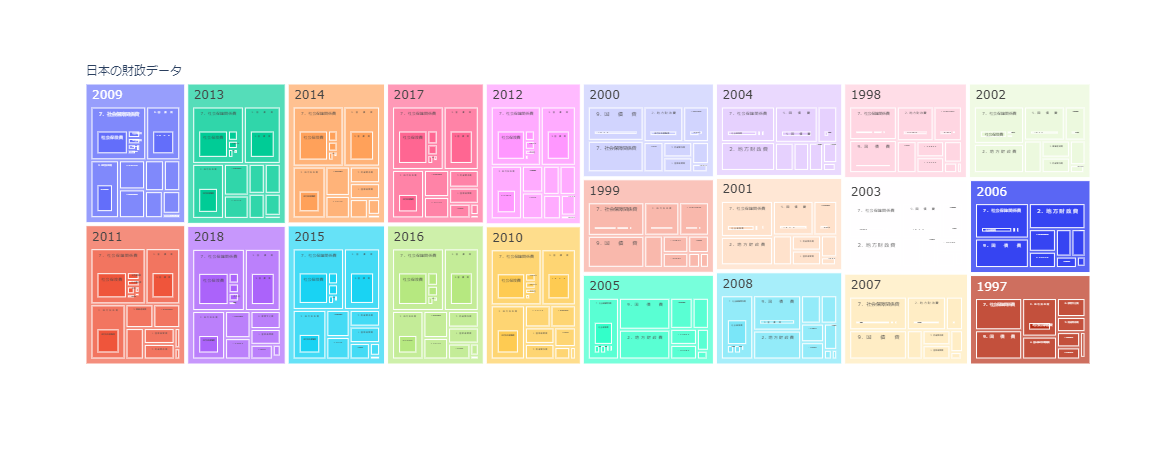

In [49]:
zaisei_melt['board'] = '日本の財政データ'
px.treemap(zaisei_melt, path=['board', 'variable', 'main_title', 'title'], values='value')

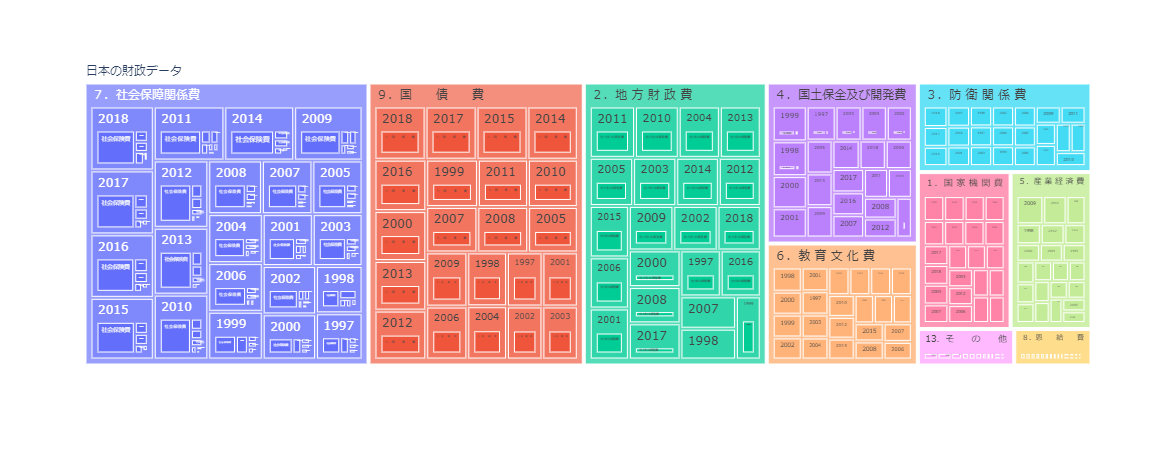

In [50]:
px.treemap(zaisei_melt, path=['board', 'main_title', 'variable', 'title'], values='value')